# Proyecto #2 - Security Data Science

María Isabel Ortiz Naranjo -
Luis Alejandro Urbina Hernández - 18473

Importación de librerías que utilizaremos a lo largo del desarrollo del proyecto

In [8]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, precision_score, recall_score, RocCurveDisplay
from sklearn.svm import SVC
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
pd.set_option('display.max_rows', None)

## Parte 1: Sampling de datos

El primer problema que encontramos fue el tamaño de los datasets de entreno y pruebas proporcionados por Microsoft. Por lo que se decidió utilizar una muestra pequeña pero significativa de dichos datos. En concreto, se decidió utilizar 1/256 de datos aleatorios del set de entrenamiento (train.csv) que originalmente contenía 8,921,483 datos y 1/256 de datos aleatorios del set de testeo (test.csv) que originalmente contenía 7,853,253 datos.

### Declaración de los tipos que se utilizarán en la data

In [2]:
my_data_types = {
    "MachineIdentifier":                                    "category",
    "ProductName":                                          "category",
    "EngineVersion":                                        "category",
    "AppVersion":                                           "category",
    "AvSigVersion":                                         "category",
    "IsBeta":                                               "int64",
    "RtpStateBitfield":                                     "float64",
    "IsSxsPassiveMode":                                     "int64",
    "DefaultBrowsersIdentifier":                            "float64",
    "AVProductStatesIdentifier":                            "float64",
    "AVProductsInstalled":                                  "float64",
    "AVProductsEnabled":                                    "float64",
    "HasTpm":                                               "int64",
    "CountryIdentifier":                                    "int64",
    "CityIdentifier":                                       "float64",
    "OrganizationIdentifier":                               "float64",
    "GeoNameIdentifier":                                    "float64",
    "LocaleEnglishNameIdentifier":                          "int64",
    "Platform":                                             "category",
    "Processor":                                            "category",
    "OsVer":                                                "category",
    "OsBuild":                                              "int64",
    "OsSuite":                                              "int64",
    "OsPlatformSubRelease":                                 "category",
    "OsBuildLab":                                           "category",
    "SkuEdition":                                           "category",
    "IsProtected":                                          "float64",
    "AutoSampleOptIn":                                      "int64",
    "PuaMode":                                              "category",
    "SMode":                                                "float64",
    "IeVerIdentifier":                                      "float64",
    "SmartScreen":                                          "category",
    "Firewall":                                             "float64",
    "Census_MDC2FormFactor":                                "category",
    "Census_DeviceFamily":                                  "category",
    "Census_OEMNameIdentifier":                             "float64",
    "Census_OEMModelIdentifier":                            "float64",
    "Census_ProcessorCoreCount":                            "float64",
    "Census_ProcessorManufacturerIdentifier":               "float64",
    "Census_ProcessorModelIdentifier":                      "float64",
    "Census_ProcessorClass":                                "category",
    "Census_PrimaryDiskTotalCapacity":                      "float64",
    "Census_PrimaryDiskTypeName":                           "category",
    "Census_SystemVolumeTotalCapacity":                     "float64",
    "Census_HasOpticalDiskDrive":                           "int64",
    "Census_TotalPhysicalRAM":                              "float64",
    "Census_ChassisTypeName":                               "category",
    "Census_InternalPrimaryDiagonalDisplaySizeInInches":    "float64",
    "Census_InternalPrimaryDisplayResolutionHorizontal":    "float64",
    "Census_InternalPrimaryDisplayResolutionVertical":      "float64",
    "Census_PowerPlatformRoleName":                         "category",
    "Census_InternalBatteryType":                           "category",
    "Census_InternalBatteryNumberOfCharges":                "float64",
    "Census_OSVersion":                                     "category",
    "Census_OSArchitecture":                                "category",
    "Census_OSBranch":                                      "category",
    "Census_OSBuildNumber":                                 "int64",
    "Census_OSBuildRevision":                               "int32",
    "Census_OSEdition":                                     "category",
    "Census_OSSkuName":                                     "category",
    "Census_OSInstallTypeName":                             "category",
    "Census_OSInstallLanguageIdentifier":                   "float64",
    "Census_OSUILocaleIdentifier":                          "int64",
    "Census_OSWUAutoUpdateOptionsName":                     "category",
    "Census_IsPortableOperatingSystem":                     "int64",
    "Census_GenuineStateName":                              "category",
    "Census_ActivationChannel":                             "category",
    "Census_IsFlightingInternal":                           "float64",
    "Census_IsFlightsDisabled":                             "float64",
    "Census_FlightRing":                                    "category",
    "Census_ThresholdOptIn":                                "float64",
    "Census_FirmwareManufacturerIdentifier":                "float64",
    "Census_FirmwareVersionIdentifier":                     "float64",
    "Census_IsSecureBootEnabled":                           "int64",
    "Census_IsWIMBootEnabled":                              "float64",
    "Census_IsVirtualDevice":                               "float64",
    "Census_IsTouchEnabled":                                "int64",
    "Census_IsPenCapable":                                  "int64",
    "Census_IsAlwaysOnAlwaysConnectedCapable":              "float64",
    "Wdft_IsGamer":                                         "float64",
    "Wdft_RegionIdentifier":                                "float64",
    "HasDetections":                                        "int64",
    "UacLuaenable":                                         "float64"
}

### Importamos los CSVs con la data y los convertimos en dataframes (en cells separadas para evitar que el programa se trabe)

In [5]:
testDF = pd.read_csv('test.csv', dtype=my_data_types)

In [ ]:
trainDF = pd.read_csv('train.csv', dtype=my_data_types)

### Sacamos los samples de cada data frame

In [6]:
# Sacar un sample de 1/256 del tamaño del dataset original

sampleTestDF = testDF.sample(n = int(testDF.shape[0]/256))

In [7]:
# Imprimir dimensiones del sample dataFrame

sampleTestDF.shape

(30676, 82)

In [8]:
# Imprimir cabeza del sample dataFrame

sampleTestDF.head()

,MachineIdentifier,ProductName,EngineVersion,AppVersion,AvSigVersion,IsBeta,RtpStateBitfield,IsSxsPassiveMode,DefaultBrowsersIdentifier,AVProductStatesIdentifier,...,Census_FirmwareManufacturerIdentifier,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsWIMBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier
5762678,bbd443b47f4d84dcacf2a23d6553ba2c,win8defender,1.1.15400.5,4.18.1810.5,1.281.90.0,0,7.0,0,NaN,53447.0,...,628.0,47409.0,0,NaN,0.0,0,0,0.0,0.0,3.0
3154936,66cc25057141a28bf9c3808c150dd73f,win8defender,1.1.15300.6,4.18.1809.2,1.277.832.0,0,7.0,0,NaN,53447.0,...,554.0,33066.0,1,NaN,0.0,0,0,0.0,1.0,4.0
2301924,4b0639733251cdb8c719dbf2041bf364,win8defender,1.1.15300.6,4.18.1809.2,1.277.515.0,0,7.0,0,NaN,53447.0,...,897.0,7314.0,1,NaN,0.0,0,0,0.0,0.0,13.0
6034363,c4b8d3eac44e254bd5005eb7dd9c7e1c,win8defender,1.1.15400.4,4.18.1810.5,1.279.516.0,0,7.0,0,NaN,53447.0,...,142.0,70418.0,1,0.0,0.0,0,0,0.0,0.0,15.0
7287501,ed8a91f7430b5131c71d6a41d0ec8985,win8defender,1.1.15300.6,4.18.1809.2,1.277.911.0,0,0.0,0,NaN,53447.0,...,556.0,56929.0,0,0.0,0.0,0,0,0.0,0.0,10.0


In [9]:
# Agrupamos el dataset anterior por los dos posibles valores de HasDetections

trainDFGrouped = trainDF.groupby('HasDetections', group_keys=False)

In [10]:
# Sacamos un sample de 1/256 del tamaño del dataset original

sampleTrainDF = trainDFGrouped.apply(lambda x: x.sample(min(len(x), int(trainDF.shape[0]/256))))

In [11]:
# Imprimir dimensiones del sample dataFrame

sampleTrainDF.shape

(69698, 83)

In [12]:
# Imprimir cabeza del sample dataFrame

sampleTrainDF.head()

,MachineIdentifier,ProductName,EngineVersion,AppVersion,AvSigVersion,IsBeta,RtpStateBitfield,IsSxsPassiveMode,DefaultBrowsersIdentifier,AVProductStatesIdentifier,...,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsWIMBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections
5988857,abe3529fa18560122e75e2089dbf80eb,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1863.0,0,7.0,0,NaN,53447.0,...,33039.0,1,NaN,0.0,0,0,0.0,0.0,15.0,0.0
2833233,514c8406cb449e5e300b483418d1f2a4,win8defender,1.1.15100.1,4.16.17656.18052,1.273.1208.0,0,7.0,0,NaN,53447.0,...,48453.0,0,NaN,0.0,0,0,0.0,0.0,11.0,0.0
6720797,c0e0d3782523a9a7755d642721ca1df8,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1270.0,0,7.0,0,NaN,53447.0,...,8126.0,0,NaN,1.0,0,1,0.0,0.0,7.0,0.0
477576,0dbbbd704bb660e7a9b093b124ba7f4b,win8defender,1.1.15200.1,4.18.1807.18075,1.275.938.0,0,7.0,0,NaN,53447.0,...,13299.0,0,0.0,1.0,0,0,0.0,0.0,13.0,0.0
2154397,3dd376626fa97394523d18184276721a,win8defender,1.1.14901.4,4.16.17656.18052,1.269.913.0,0,7.0,0,NaN,62773.0,...,33157.0,0,0.0,0.0,0,0,0.0,0.0,11.0,0.0


### Guardar los samples en el directorio actual como CSVs (estos servirán para que a la hora de probarlo no sea necesario volver a ejecutar el proceso sampling desde cero, por cuestiones de tiempo)

In [13]:
sampleTestDF.to_csv('sample_test.csv')

In [1]:
sampleTrainDF.to_csv('sample_train.csv')

NameError: name 'sampleTrainDF' is not defined

### Volver a cargar los samples a las mismas variables para ahorrar tiempo en la creación de los samples

In [3]:
sampleTrainDF = pd.read_csv('sample_train.csv', dtype=my_data_types)
sampleTestDF = pd.read_csv('sample_test.csv', dtype=my_data_types)

## Parte 2: Exploración de resultados

En esta parte se procedió a limpiar la data y a analizar los datos de manera detenida para determinar qué variables utilizaríamos para los modelos desarrollados posteriormente.

In [4]:
# Revisemos el head del dataFrame de nuevo

sampleTrainDF.head()

,Unnamed: 0,MachineIdentifier,ProductName,EngineVersion,AppVersion,AvSigVersion,IsBeta,RtpStateBitfield,IsSxsPassiveMode,DefaultBrowsersIdentifier,...,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsWIMBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections
0,5988857,abe3529fa18560122e75e2089dbf80eb,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1863.0,0,7.0,0,NaN,...,33039.0,1,NaN,0.0,0,0,0.0,0.0,15.0,0
1,2833233,514c8406cb449e5e300b483418d1f2a4,win8defender,1.1.15100.1,4.16.17656.18052,1.273.1208.0,0,7.0,0,NaN,...,48453.0,0,NaN,0.0,0,0,0.0,0.0,11.0,0
2,6720797,c0e0d3782523a9a7755d642721ca1df8,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1270.0,0,7.0,0,NaN,...,8126.0,0,NaN,1.0,0,1,0.0,0.0,7.0,0
3,477576,0dbbbd704bb660e7a9b093b124ba7f4b,win8defender,1.1.15200.1,4.18.1807.18075,1.275.938.0,0,7.0,0,NaN,...,13299.0,0,0.0,1.0,0,0,0.0,0.0,13.0,0
4,2154397,3dd376626fa97394523d18184276721a,win8defender,1.1.14901.4,4.16.17656.18052,1.269.913.0,0,7.0,0,NaN,...,33157.0,0,0.0,0.0,0,0,0.0,0.0,11.0,0


In [5]:
# Obtengamos información del dataFrame

sampleTrainDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69698 entries, 0 to 69697
Data columns (total 84 columns):
 #   Column                                             Non-Null Count  Dtype   
---  ------                                             --------------  -----   
 0   Unnamed: 0                                         69698 non-null  int64   
 1   MachineIdentifier                                  69698 non-null  category
 2   ProductName                                        69698 non-null  category
 3   EngineVersion                                      69698 non-null  category
 4   AppVersion                                         69698 non-null  category
 5   AvSigVersion                                       69698 non-null  category
 6   IsBeta                                             69698 non-null  int64   
 7   RtpStateBitfield                                   69449 non-null  float64 
 8   IsSxsPassiveMode                                   69698 non-null  int64   


### Primero, vemos qué columnas tienen el mayor porcentaje de valores nulos

In [6]:
# Obtener las columnas con el mayor porcentaje de datos nulos
# Código extraído de -> https://stackoverflow.com/questions/51070985/find-out-the-percentage-of-missing-values-in-each-column-in-the-given-dataset

missingValesPorcentaje = sampleTrainDF.isnull().sum() * 100 / len(sampleTrainDF)
missingValuesDataF = pd.DataFrame({'columna': sampleTrainDF.columns, 'porcentaje null': missingValesPorcentaje})
missingValuesDataF.sort_values("porcentaje null", ascending=False)

,columna,porcentaje null
PuaMode,PuaMode,99.967000
Census_ProcessorClass,Census_ProcessorClass,99.579615
DefaultBrowsersIdentifier,DefaultBrowsersIdentifier,95.137594
Census_IsFlightingInternal,Census_IsFlightingInternal,83.285030
Census_InternalBatteryType,Census_InternalBatteryType,71.362162
Census_ThresholdOptIn,Census_ThresholdOptIn,63.922925
Census_IsWIMBootEnabled,Census_IsWIMBootEnabled,63.835404
SmartScreen,SmartScreen,35.569170
OrganizationIdentifier,OrganizationIdentifier,30.824414
SMode,SMode,5.995868


### Segundo, contemos los unique values por columna del dataset (sin incluir NaN) y vemos la cardinalidad de cada columna

In [7]:
# Obtener los uniqueValues de cada columna del dataset 
# Código extraído de -> https://www.geeksforgeeks.org/python-pandas-dataframe-nunique/

uniqueValues = sampleTrainDF.nunique(dropna=False)
uniqueValues.sort_values(ascending=False)

Unnamed: 0                                           69698
MachineIdentifier                                    69698
Census_SystemVolumeTotalCapacity                     34534
Census_OEMModelIdentifier                            13166
CityIdentifier                                       12850
Census_FirmwareVersionIdentifier                     10536
AvSigVersion                                          3517
AVProductStatesIdentifier                             1699
Census_ProcessorModelIdentifier                       1564
Census_InternalBatteryNumberOfCharges                 1418
Census_OEMNameIdentifier                               786
Census_PrimaryDiskTotalCapacity                        393
Census_InternalPrimaryDiagonalDisplaySizeInInches      337
OsBuildLab                                             316
DefaultBrowsersIdentifier                              242
Census_OSVersion                                       239
GeoNameIdentifier                                      2

### Tercero, chequemos la distribución de la variable que nos interesa: HasDetections

In [8]:
sampleTrainDF.groupby('HasDetections', group_keys=False).count()

,Unnamed: 0,MachineIdentifier,ProductName,EngineVersion,AppVersion,AvSigVersion,IsBeta,RtpStateBitfield,IsSxsPassiveMode,DefaultBrowsersIdentifier,...,Census_FirmwareManufacturerIdentifier,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsWIMBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier
HasDetections,,,,,,,,,,,,,,,,,,,,,
0,34849,34849,34849,34849,34849,34849,34849,34713,34849,1818,...,33991,34092,34849,12804,34784,34849,34849,34556,33684,33684
1,34849,34849,34849,34849,34849,34849,34849,34736,34849,1571,...,34219,34304,34849,12402,34773,34849,34849,34555,33612,33612


## Parte 3: Pre-procesamiento

En esta parte nos encargamos de limpiar la data, eliminar columnas que no nos servirán y reemplazar valores en las columnas para que nuestros modelos puedan ser más precisos.

### Primero, eliminaremos columnas con muchos valores nulos

In [9]:
sampleTrainDF = sampleTrainDF.drop(labels=["OrganizationIdentifier","SmartScreen","Census_IsWIMBootEnabled", "Census_ThresholdOptIn",
                                           "Census_InternalBatteryType", "Census_IsFlightingInternal", "DefaultBrowsersIdentifier", 
                                           "Census_ProcessorClass", "PuaMode"], axis=1)

### Posteriormente, eliminaremos columnas con un alto número de unique values (unique values > 200)

In [10]:
sampleTrainDF = sampleTrainDF.drop(labels=["Unnamed: 0", "MachineIdentifier", "Census_SystemVolumeTotalCapacity", 
                                           "Census_OEMModelIdentifier", "CityIdentifier", "Census_FirmwareVersionIdentifier",
                                           "AvSigVersion", "AVProductStatesIdentifier", "Census_ProcessorModelIdentifier", "Census_InternalBatteryNumberOfCharges",
                                           "Census_OEMNameIdentifier", "Census_PrimaryDiskTotalCapacity", "Census_InternalPrimaryDiagonalDisplaySizeInInches",
                                           "OsBuildLab", "GeoNameIdentifier", "CountryIdentifier",
                                           "Census_OSBuildRevision"], axis=1)

In [11]:
sampleTrainDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69698 entries, 0 to 69697
Data columns (total 58 columns):
 #   Column                                             Non-Null Count  Dtype   
---  ------                                             --------------  -----   
 0   ProductName                                        69698 non-null  category
 1   EngineVersion                                      69698 non-null  category
 2   AppVersion                                         69698 non-null  category
 3   IsBeta                                             69698 non-null  int64   
 4   RtpStateBitfield                                   69449 non-null  float64 
 5   IsSxsPassiveMode                                   69698 non-null  int64   
 6   AVProductsInstalled                                69420 non-null  float64 
 7   AVProductsEnabled                                  69420 non-null  float64 
 8   HasTpm                                             69698 non-null  int64   


### Finalmente, eliminaremos columnas que no nos servirán

In [12]:
sampleTrainDF = sampleTrainDF.drop(labels=["ProductName", "IsBeta", "RtpStateBitfield", "IsSxsPassiveMode",
                                           "AVProductsInstalled", "AVProductsEnabled", "AutoSampleOptIn",
                                           "IeVerIdentifier", "Census_ChassisTypeName", "Census_InternalPrimaryDisplayResolutionHorizontal",
                                           "Census_InternalPrimaryDisplayResolutionVertical", "Census_PowerPlatformRoleName",
                                           "Census_OSBuildNumber", "Census_OSInstallTypeName", "Census_OSInstallLanguageIdentifier",
                                           "Census_OSUILocaleIdentifier", "Census_OSWUAutoUpdateOptionsName", "Census_IsPortableOperatingSystem",
                                           "Census_GenuineStateName", "Census_ActivationChannel", "Census_IsFlightsDisabled",
                                           "Census_FlightRing","Census_FirmwareManufacturerIdentifier", "Census_IsVirtualDevice","Census_IsTouchEnabled",
                                           "Census_IsPenCapable", "Census_IsAlwaysOnAlwaysConnectedCapable"], axis=1)

In [13]:
sampleTrainDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69698 entries, 0 to 69697
Data columns (total 31 columns):
 #   Column                                  Non-Null Count  Dtype   
---  ------                                  --------------  -----   
 0   EngineVersion                           69698 non-null  category
 1   AppVersion                              69698 non-null  category
 2   HasTpm                                  69698 non-null  int64   
 3   LocaleEnglishNameIdentifier             69698 non-null  int64   
 4   Platform                                69698 non-null  category
 5   Processor                               69698 non-null  category
 6   OsVer                                   69698 non-null  category
 7   OsBuild                                 69698 non-null  int64   
 8   OsSuite                                 69698 non-null  int64   
 9   OsPlatformSubRelease                    69698 non-null  category
 10  SkuEdition                              69698 

### Vemos qué columnas tienen NaN, luego llenaremos esos datos con datos aleatorios de cada columna

In [14]:
sampleTrainDF.isna().sum()

EngineVersion                                0
AppVersion                                   0
HasTpm                                       0
LocaleEnglishNameIdentifier                  0
Platform                                     0
Processor                                    0
OsVer                                        0
OsBuild                                      0
OsSuite                                      0
OsPlatformSubRelease                         0
SkuEdition                                   0
IsProtected                                277
SMode                                     4179
Firewall                                   714
UacLuaenable                                90
Census_MDC2FormFactor                        0
Census_DeviceFamily                          0
Census_ProcessorCoreCount                  360
Census_ProcessorManufacturerIdentifier     360
Census_PrimaryDiskTypeName                 100
Census_HasOpticalDiskDrive                   0
Census_TotalP

In [15]:
# For IsProtected Column
sampleTrainDF.IsProtected.value_counts()

1.0    65600
0.0     3821
Name: IsProtected, dtype: int64

In [16]:
sampleTrainDF['IsProtected'] = sampleTrainDF['IsProtected'].fillna(random.choice([0.0, 1.0]))

In [17]:
# For SMode
sampleTrainDF.SMode.value_counts()

0.0    65487
1.0       32
Name: SMode, dtype: int64

In [18]:
sampleTrainDF['SMode'] = sampleTrainDF['SMode'].fillna(random.choice([0.0, 1.0]))

In [19]:
# For Firewall
sampleTrainDF.Firewall.value_counts()

1.0    67551
0.0     1433
Name: Firewall, dtype: int64

In [20]:
sampleTrainDF['Firewall'] = sampleTrainDF['Firewall'].fillna(random.choice([0.0, 1.0]))

In [21]:
# For UacLuaenable
sampleTrainDF.UacLuaenable.value_counts()

1.0     69182
0.0       425
48.0        1
Name: UacLuaenable, dtype: int64

In [22]:
sampleTrainDF['UacLuaenable'] = sampleTrainDF['UacLuaenable'].fillna(random.choice([0.0, 1.0, 48.0]))

In [23]:
# For Census_ProcessorCoreCount
sampleTrainDF.Census_ProcessorCoreCount.value_counts()

4.0     42479
2.0     17950
8.0      6725
12.0      734
1.0       581
6.0       570
16.0      151
3.0        97
20.0       15
24.0       14
32.0       11
5.0         2
40.0        2
10.0        1
28.0        1
9.0         1
7.0         1
36.0        1
48.0        1
64.0        1
Name: Census_ProcessorCoreCount, dtype: int64

In [24]:
sampleTrainDF['Census_ProcessorCoreCount'] = sampleTrainDF['Census_ProcessorCoreCount'].fillna(random.choice([4.0, 2.0, 8.0]))

In [25]:
# For Census_ProcessorManufacturerIdentifier
sampleTrainDF.Census_ProcessorManufacturerIdentifier.value_counts()

5.0     61380
1.0      7953
10.0        3
3.0         2
Name: Census_ProcessorManufacturerIdentifier, dtype: int64

In [26]:
sampleTrainDF['Census_ProcessorManufacturerIdentifier'] = sampleTrainDF['Census_ProcessorManufacturerIdentifier'].fillna(random.choice([5.0, 1.0, 10.0]))

In [27]:
# For Census_PrimaryDiskTypeName
sampleTrainDF.Census_PrimaryDiskTypeName.value_counts()

HDD            45256
SSD            19346
UNKNOWN         2898
Unspecified     2098
Name: Census_PrimaryDiskTypeName, dtype: int64

In [28]:
sampleTrainDF['Census_PrimaryDiskTypeName'] = sampleTrainDF['Census_PrimaryDiskTypeName'].fillna(random.choice(['HDD', 'SSD', 'UNKNOWN']))

In [29]:
# For Census_TotalPhysicalRAM
sampleTrainDF.Census_TotalPhysicalRAM.value_counts()

4096.0      31976
8192.0      17024
2048.0       8725
16384.0      4123
6144.0       3143
12288.0      1230
3072.0       1172
1024.0        523
32768.0       462
24576.0        88
10240.0        81
5120.0         66
65536.0        61
1536.0         41
2047.0         32
2560.0         31
20480.0        28
4095.0         27
14336.0        15
7168.0         13
3584.0          7
8191.0          6
131072.0        6
18432.0         5
1280.0          5
6143.0          5
9216.0          5
1023.0          5
49152.0         4
40960.0         4
2304.0          4
28672.0         3
98304.0         3
16383.0         3
7999.0          3
8060.0          2
3839.0          2
13312.0         2
4088.0          2
8092.0          2
8047.0          2
8079.0          2
6142.0          2
3071.0          2
8056.0          2
7935.0          2
3000.0          2
2000.0          2
3327.0          2
2037.0          2
1967.0          2
4608.0          2
6208.0          2
1552.0          1
2704.0          1
3096.0    

In [30]:
sampleTrainDF['Census_TotalPhysicalRAM'] = sampleTrainDF['Census_TotalPhysicalRAM'].fillna(random.choice([4096.0, 8192.0, 2048.0]))

In [31]:
# For Wdft_IsGamer
sampleTrainDF.Wdft_IsGamer.value_counts()

0.0    48327
1.0    18969
Name: Wdft_IsGamer, dtype: int64

In [32]:
sampleTrainDF['Wdft_IsGamer'] = sampleTrainDF['Wdft_IsGamer'].fillna(random.choice([0.0, 1.0]))

In [33]:
# For Wdft_RegionIdentifier
sampleTrainDF.Wdft_RegionIdentifier.value_counts()

10.0    13844
11.0    10605
3.0     10118
1.0      9664
15.0     7957
7.0      4733
8.0      2151
13.0     1744
5.0      1602
12.0     1272
6.0      1252
4.0      1079
2.0       642
9.0       601
14.0       32
Name: Wdft_RegionIdentifier, dtype: int64

In [34]:
sampleTrainDF['Wdft_RegionIdentifier'] = sampleTrainDF['Wdft_RegionIdentifier'].fillna(random.choice([10.0, 11.0, 3.0]))

### Finalmente, sacamos la correlación entre las columnas relevantes

<AxesSubplot:>

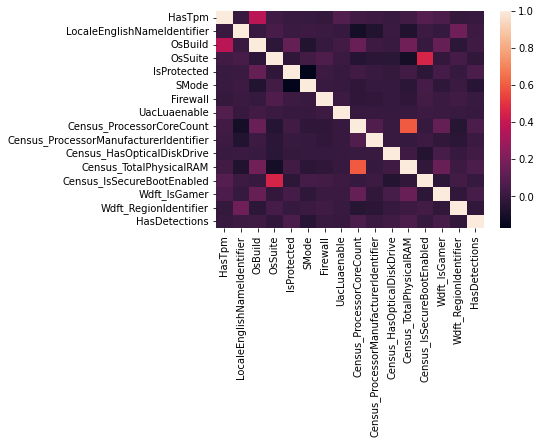

In [35]:
correlationTable = sampleTrainDF.corr()
plt.plot(figsize=(40, 15))
sns.heatmap(correlationTable, xticklabels=correlationTable.columns, yticklabels=correlationTable.columns)

### Ahora, nos encontramos con un problema, tenemos muchas columnas que tienen variables categóricas que tienen una alta cardinalidad (value_counts()), lo que debemos hacer es volver estas columnas en columnas de tipo int64, para ello usaremos get_dummies() de pandas.

In [36]:
sampleTrainDF.to_csv('checkpoint.csv')

In [37]:
sampleTrainDFBeforeDummies = pd.read_csv('checkpoint.csv')

In [38]:
categoricalColumns = ['EngineVersion', 'AppVersion', 'Platform', 'Processor', 'OsVer', 'OsPlatformSubRelease', 'SkuEdition',
                     'Census_MDC2FormFactor', 'Census_DeviceFamily', 'Census_PrimaryDiskTypeName', 'Census_OSVersion',
                     'Census_OSArchitecture', 'Census_OSBranch', 'Census_OSEdition', 'Census_OSSkuName']

sampleTrainDFAfterDummies = pd.get_dummies(sampleTrainDFBeforeDummies, columns=categoricalColumns)

In [39]:
# Vemos que nuestro dataFrame ya no tiene columnas categórigcas
sampleTrainDFAfterDummies.dtypes

Unnamed: 0                                         int64
HasTpm                                             int64
LocaleEnglishNameIdentifier                        int64
OsBuild                                            int64
OsSuite                                            int64
IsProtected                                      float64
SMode                                            float64
Firewall                                         float64
UacLuaenable                                     float64
Census_ProcessorCoreCount                        float64
Census_ProcessorManufacturerIdentifier           float64
Census_HasOpticalDiskDrive                         int64
Census_TotalPhysicalRAM                          float64
Census_IsSecureBootEnabled                         int64
Wdft_IsGamer                                     float64
Wdft_RegionIdentifier                            float64
HasDetections                                      int64
EngineVersion_1.1.11701.0      

### Guardamos el sampleTrainDF como sampleTrainDFFinal para realizar los modelos

In [40]:
sampleTrainDFAfterDummies.to_csv('sampleTrainDFFinal.csv')

## Parte 4: Modelos

En esta parte nos encargamos de desarrollar los modelos Random Forest y Logistic Regression, calcular su curva ROC y haver la validación de K Cross.

### Cargamos el sampleTrainDFFinal

In [3]:
dfFinalTrain = pd.read_csv('sampleTrainDFFinal.csv')

In [4]:
dfFinalTrain.head()

,Unnamed: 0.1,Unnamed: 0,HasTpm,LocaleEnglishNameIdentifier,OsBuild,OsSuite,IsProtected,SMode,Firewall,UacLuaenable,...,Census_OSSkuName_ENTERPRISE_N,Census_OSSkuName_ENTERPRISE_S,Census_OSSkuName_ENTERPRISE_S_N,Census_OSSkuName_PROFESSIONAL,Census_OSSkuName_PROFESSIONAL_N,Census_OSSkuName_PRO_WORKSTATION,Census_OSSkuName_PRO_WORKSTATION_N,Census_OSSkuName_SB_SOLUTION_SERVER,Census_OSSkuName_STANDARD_EVALUATION_SERVER,Census_OSSkuName_STANDARD_SERVER
0,0,0,1,66,14393,768,1.0,0.0,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,251,17134,768,1.0,0.0,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0
2,2,2,1,42,17134,256,1.0,0.0,1.0,0.0,...,0,0,0,1,0,0,0,0,0,0
3,3,3,1,75,16299,256,1.0,0.0,1.0,1.0,...,0,0,0,1,0,0,0,0,0,0
4,4,4,1,251,16299,768,0.0,0.0,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
dfFinalTrain = dfFinalTrain.drop(["Unnamed: 0.1", "Unnamed: 0"], axis=1)

In [5]:
dfFinalTrain.head()

,HasTpm,LocaleEnglishNameIdentifier,OsBuild,OsSuite,IsProtected,SMode,Firewall,UacLuaenable,Census_ProcessorCoreCount,Census_ProcessorManufacturerIdentifier,...,Census_OSSkuName_ENTERPRISE_N,Census_OSSkuName_ENTERPRISE_S,Census_OSSkuName_ENTERPRISE_S_N,Census_OSSkuName_PROFESSIONAL,Census_OSSkuName_PROFESSIONAL_N,Census_OSSkuName_PRO_WORKSTATION,Census_OSSkuName_PRO_WORKSTATION_N,Census_OSSkuName_SB_SOLUTION_SERVER,Census_OSSkuName_STANDARD_EVALUATION_SERVER,Census_OSSkuName_STANDARD_SERVER
0,1,66,14393,768,1.0,0.0,1.0,1.0,2.0,5.0,...,0,0,0,0,0,0,0,0,0,0
1,1,251,17134,768,1.0,0.0,1.0,1.0,8.0,5.0,...,0,0,0,0,0,0,0,0,0,0
2,1,42,17134,256,1.0,0.0,1.0,0.0,2.0,5.0,...,0,0,0,1,0,0,0,0,0,0
3,1,75,16299,256,1.0,0.0,1.0,1.0,1.0,5.0,...,0,0,0,1,0,0,0,0,0,0
4,1,251,16299,768,0.0,0.0,1.0,1.0,4.0,5.0,...,0,0,0,0,0,0,0,0,0,0


### Obtenemos las variables (my_y = HasDetections columns, my_x = resto de las variables del df)

In [6]:
my_y = dfFinalTrain["HasDetections"]
my_x = dfFinalTrain.drop(["HasDetections"], axis = 1)

In [7]:
# Obtenemos los resultados de train_test_split
X_train, X_test, y_train, y_test = train_test_split(my_x, my_y, test_size=0.4,random_state=1)

## Decision Trees

In [9]:
# Hacemos el fit del modelo svc con los datos del entrenamiento
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

In [10]:
predictedYDecisionTree = clf.predict(X_test)

### Métricas de evaluación

In [11]:
print("La accuracy es de -> ", accuracy_score(y_test, predictedYDecisionTree))
print("La precision es de -> ", precision_score(y_test, predictedYDecisionTree))
print("El recall es de -> ", recall_score(y_test, predictedYDecisionTree))
print("El roc auc score es de -> ", roc_auc_score(y_test, predictedYDecisionTree))
print("El f1 score es de -> ", f1_score(y_test, predictedYDecisionTree))

La accuracy es de ->  0.5269727403156385
La precision es de ->  0.5238440353674445
El recall es de ->  0.5220280225335837
El roc auc score es de ->  0.5269396205015076
El f1 score es de ->  0.5229344523223847


### Gráfica de la curva ROC

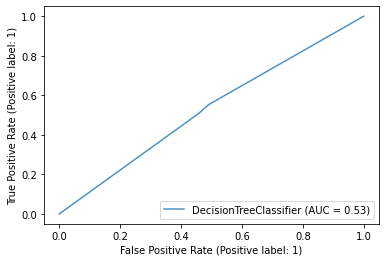

In [12]:
ax = plt.gca()
rfc_disp = RocCurveDisplay.from_estimator(clf, X_test, y_test, ax=ax, alpha=0.8)
plt.show()

### Evaluación cruzada con K - folds para k = 10

In [14]:
print(cross_val_score(clf, my_x, my_y, cv=10))

[0.52453372 0.52984218 0.52812052 0.53199426 0.52740316 0.52883788
 0.52553802 0.52611191 0.52546994 0.52833979]


## RF Classifier

In [16]:
# Hacemos el fit del modelo random forest con los datos de entrenamiento
randomForestClassfierFit = RandomForestClassifier(n_estimators = 124, random_state = 2).fit(X_train, y_train)

In [17]:
predictedY = randomForestClassfierFit.predict(X_test)

### Métricas de evaluación

In [133]:
print("La accuracy es de -> ", accuracy_score(y_test, predictedY))
print("La precision es de -> ", precision_score(y_test, predictedY))
print("El recall es de -> ", recall_score(y_test, predictedY))
print("El roc auc score es de -> ", roc_auc_score(y_test, predictedY))
print("El f1 score es de -> ", f1_score(y_test, predictedY))

La accuracy es de ->  0.5548421807747489
La precision es de ->  0.5519287833827893
El recall es de ->  0.5507727863642929
El roc auc score es de ->  0.5548149238932766
El f1 score es de ->  0.5513501789393775


### Gráfica de la curva ROC

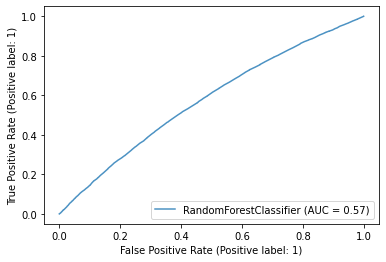

In [130]:
ax = plt.gca()
rfc_disp = RocCurveDisplay.from_estimator(randomForestClassfierFit, X_test, y_test, ax=ax, alpha=0.8)
plt.show()

### Evaluación cruzada con K - folds para k = 10

In [ ]:
print(cross_val_score(randomForestClassfierFit, my_x, my_y, cv=10))